---

---
# Chapter 1: Loading data and libraries
---

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import torch
# import torch.nn.functional as F#for relu
from tensorflow.keras.datasets import fashion_mnist


---

Loading the data

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---


Some checking

In [3]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

---

---
# ***Chapter 2: Preparing the data***
---

---

 ***Converting 2D pixels to 1D***



In [4]:
x_train = x_train.reshape(x_train.shape[0],-1)/255 #Creates 60000 rows of 784 coloumn wide Matrix
x_test = x_test.reshape(x_test.shape[0],-1)/255#Creates 60000 rows of 784 coloumn wide Matrix
x_train.shape,x_test.shape

((60000, 784), (10000, 784))



---


 ***One Hot🔥 Encoding***


In [5]:
y_train_encoded = np.eye(10)[y_train]
y_test_encoded = np.eye(10)[y_test]

---

# **Chapter 3: The meat**

---

***The Neural Network***



In [6]:
import numpy as np

class Neural_Network:
  def __init__(self,inputsize,hiddensize,outputsize,lr=0.01,ld1=0.0,ld2=0.0):
        self.W1 = np.random.randn(inputsize, hiddensize) * 0.01
        self.b1 = np.zeros((1, hiddensize))
        self.W2 = np.random.randn(hiddensize, outputsize) * 0.01
        self.b2 = np.zeros((1, outputsize))
        self.loss_history = []
        self.l1_lambda = ld1
        self.l2_lambda = ld2
        self.lr = lr
  # def sigmoid(self,x):
  #   return 1 / (1 + np.exp(-x))
  # def sigmoid_derivative(self,x):
  #   return x * (1 - x)

  def tanh(self,x):
    return np.tanh(x)
  # def tanh_derivative(self,x):
  #   return 1 - np.tanh(x) ** 2
  # def relu(self,x):
  #   for i in range(x.shape[0]):
  #     for j in range(x.shape[1]):
  #       if (x[i][j] < 0):
  #         x[i][j] = 0
  #   return x
  # def relu(self,x):
  #   return np.where(x > 0, 1, 0)
  def softmax(self,x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)
  def forward(self,x):
    self.z1=np.dot(x,self.W1)+self.b1
    self.a1=self.tanh(self.z1)
    self.z2=np.dot(self.a1,self.W2)+self.b2
    self.a2=self.softmax(self.z2)
    return self.a2
  def backward(self, X, y, output):
        m = X.shape[0]
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)

        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m


        dW1 += self.l1_lambda * np.sign(self.W1)
        dW2 += self.l1_lambda * np.sign(self.W2)


        dW1 += self.l2_lambda * self.W1
        dW2 += self.l2_lambda * self.W2

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
  def train(self, X, y, epochs, regularization_type="L2"):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # # Calculate loss with regularization penalties
            # if regularization_type == "L1":
            #     penalty = self.l1_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2)))
            # else:  # L2 Regularization by default
            #     penalty = self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))


            loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) + penalty
            self.loss_history.append(loss)

            if epoch % 1 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
  def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)



---

Training the model lets go

In [14]:
# nn_l1 = Neural_Network(inputsize=784, hiddensize=128, outputsize=10, lr=0.01, ld1=0.01)
nn_l2 = Neural_Network(inputsize=784, hiddensize=156, outputsize=10, lr=0.05, ld2=0.005)
epochs = 1000
# nn_l1.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L1")
nn_l2.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L2")

#2
# nn = Neural_Network(inputsize=784, hiddensize=512, outputsize=10, lr=0.01, l2_lambda=0.01, dropout_rate=0.5)
# nn.train(x_train, y_train_encoded, epochs=100)

#3

# nn_elasticnet = Neural_Network(inputsize=784, hiddensize=1024, outputsize=10, lr=0.01, l1_lambda=0.01, l2_lambda=0.01, dropout_rate=0.5, alpha=0.5)
# nn_elasticnet.train(x_train, y_train_encoded, epochs=1000)


Epoch 0, Loss: 2.3660
Epoch 1, Loss: 2.3620
Epoch 2, Loss: 2.3581
Epoch 3, Loss: 2.3542
Epoch 4, Loss: 2.3502
Epoch 5, Loss: 2.3462
Epoch 6, Loss: 2.3421
Epoch 7, Loss: 2.3379
Epoch 8, Loss: 2.3336
Epoch 9, Loss: 2.3292
Epoch 10, Loss: 2.3245
Epoch 11, Loss: 2.3197
Epoch 12, Loss: 2.3146
Epoch 13, Loss: 2.3093
Epoch 14, Loss: 2.3037
Epoch 15, Loss: 2.2978
Epoch 16, Loss: 2.2916
Epoch 17, Loss: 2.2850
Epoch 18, Loss: 2.2781
Epoch 19, Loss: 2.2708
Epoch 20, Loss: 2.2631
Epoch 21, Loss: 2.2550
Epoch 22, Loss: 2.2465
Epoch 23, Loss: 2.2375
Epoch 24, Loss: 2.2280
Epoch 25, Loss: 2.2181
Epoch 26, Loss: 2.2076
Epoch 27, Loss: 2.1967
Epoch 28, Loss: 2.1853
Epoch 29, Loss: 2.1733
Epoch 30, Loss: 2.1609
Epoch 31, Loss: 2.1479
Epoch 32, Loss: 2.1345
Epoch 33, Loss: 2.1206
Epoch 34, Loss: 2.1063
Epoch 35, Loss: 2.0915
Epoch 36, Loss: 2.0764
Epoch 37, Loss: 2.0610
Epoch 38, Loss: 2.0452
Epoch 39, Loss: 2.0292
Epoch 40, Loss: 2.0130
Epoch 41, Loss: 1.9967
Epoch 42, Loss: 1.9802
Epoch 43, Loss: 1.963

---
---

# **Chapter 4: Analysis of the model**

---
---

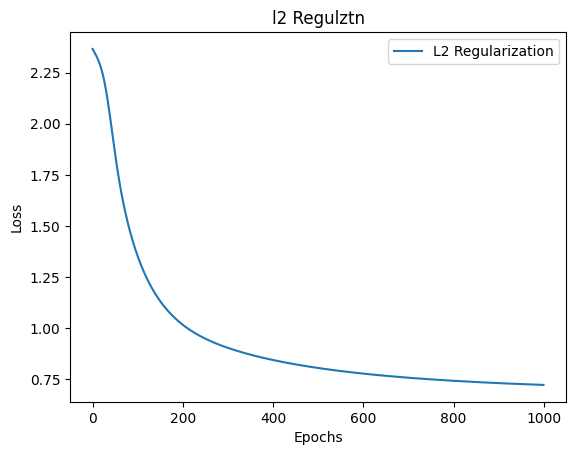

In [17]:
# plt.plot(nn_l1.loss_history, label='L1 Regularization')
plt.plot(nn_l2.loss_history, label='L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('l2 Regulztn')
plt.legend()
plt.show()




---
Calculating the acccuracy

In [16]:
predictions = nn_l2.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.8095


# Yayy >80% 😭